## Introduction

Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.
When you start a new project, you will often be doing an Exploratory Data Analusis(EDA) to gain some insights into your data. Creating visualizations will help you making things clearer and easier to understand, especially with larger, high dimensional datsets. 
There are many python librairies that can be used to create  your Data Visualization quite easily No matter if you want to create interactive, live or highly customized plots python has an excellent library for you. In this tutorial, we will lear how to create basic plots using Matplotlib, Pandas visualization and Seaborn.

## Importing the Datasets

In this tutorial, we will ue the [Iris](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) dataset which can be load in using pandas read_csv method

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/WIMLDS-CMR/Tutorial\ page\ datasets

/content/drive/MyDrive/WIMLDS-CMR/Tutorial page datasets


In [ ]:
import pandas as pd
iris = pd.read_csv('iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Matplotlib

Matplotlib is the most popular Python library that can be used to create your Data Visualizations quite easily.  It is a low-level library with a Matlab like interface which offers lots of freedom at the cost of having to write more code.
Matplotlib is specifically good for creating basic graphs like line charts, bar charts, histograms and many more.

In [ ]:
#import matplotlib
import matplotlib.pyplot as plt

#### Scatter Plot
To create a scatter plot in Matplotlib we can use the scatter method. We will also create a figure and an axis using plt.subplots so we can give our plot a title and labels.

Text(0, 0.5, 'petal_width')

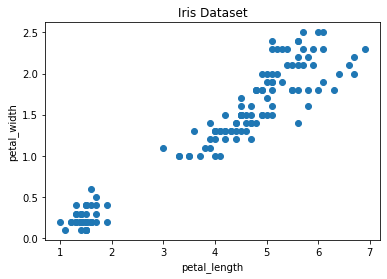

In [ ]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the petal_length against the petal_width
ax.scatter(iris['petal_length'], iris['petal_width'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')

In addition, we can color each data-point by its class in oder to give the graph more meaning.This can be done by creating a dictionary which maps from class to color and then scattering each point on its own using a for-loop and passing the respective color.

Text(0, 0.5, 'petal_width')

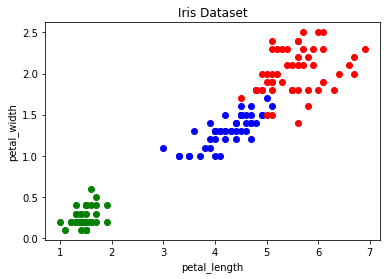

In [ ]:
# create color dictionary
colors = {'Iris-setosa':'g', 'Iris-versicolor':'b', 'Iris-virginica':'r'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(iris['petal_length'])):
    ax.scatter(iris['petal_length'][i], iris['petal_width'][i],color=colors[iris['class'][i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')

#### Line Chart
In Matplotlib we can create a line chart by calling the plot method. We can also plot multiple columns in one graph, by looping through the columns we want and plotting each column on the same axis.

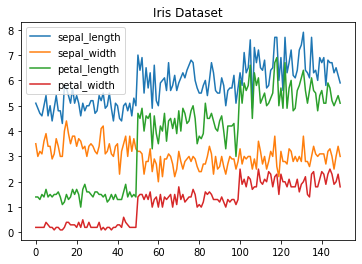

In [ ]:
# get columns to plot
columns = iris.columns.drop(['class'])
# create x data
x_data = range(0, iris.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, iris[column], label=column)
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

#### Histogram
In Matplotlib we can create a Histogram using the hist method. If we pass it categorical data like the class column from the Iris dataset it will automatically calculate how often each class occurs.

Text(0, 0.5, 'Frequency')

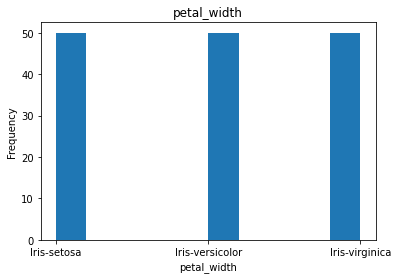

In [ ]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(iris['class'])
# set title and labels
ax.set_title('class')
ax.set_xlabel('class')
ax.set_ylabel('Frequency')

It is also possible to create multiples histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb401f41350>,
      dtype=object)

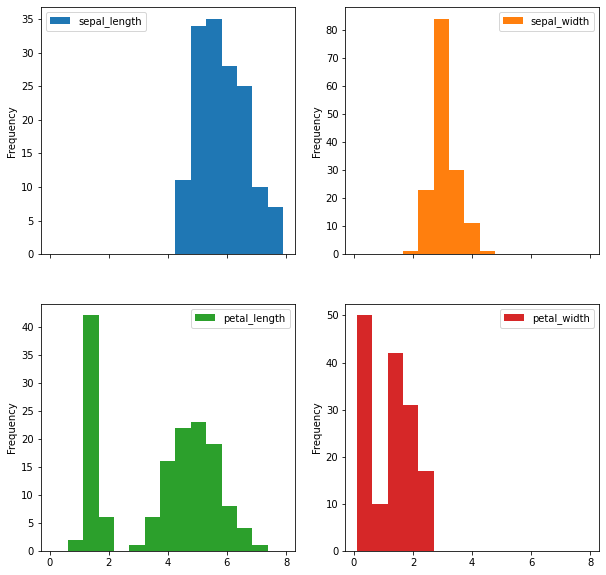

In [ ]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=15)

#### Bar *chat*
 We use bar-chart for categorical data that doesn’t have a lot of different categories (less than 30) because else it can get quite messy.

Text(0, 0.5, 'Frequency')

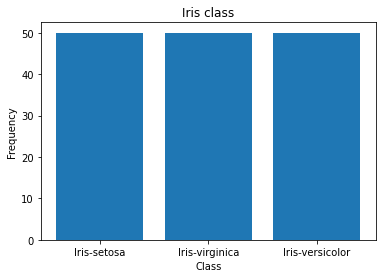

In [ ]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = iris['class'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Iris class') 
ax.set_xlabel('Class') 
ax.set_ylabel('Frequency')

### Seaborn
Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for creating attractive graphs.
The beauty of Seaborn is that you can create graphs in one line that would take you multiple tens of lines in Matplotlib

In [ ]:
#First we need to import the library
import seaborn as sns

#### Scatter plot
the difference here with pandas is that we need to pass the data as additional argument because we are not calling the function on the data directly

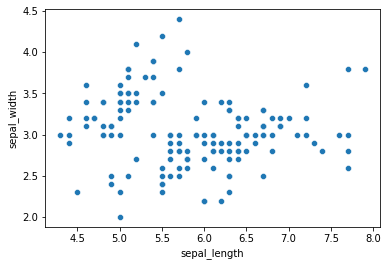

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

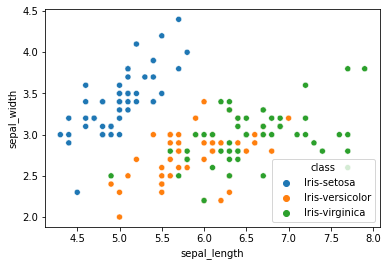

In [ ]:
# Lets highlight the points by class using hue argument which is is quite easier than in Matplotlib
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)


#### Line chart
The only required argument here is the data

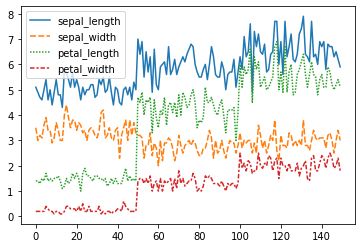

In [ ]:
sns.lineplot(data=iris.drop(['class'], axis=1))

#### Histogram
We need to pass it the column we want to plot and it will calculate the occurrences itself. We can also pass it the number of bins, and if we want to plot a gaussian kernel density estimate inside the graph.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


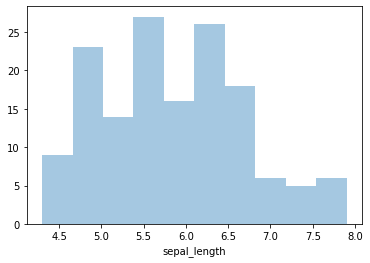

In [ ]:
sns.distplot(iris['sepal_length'], bins=10, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


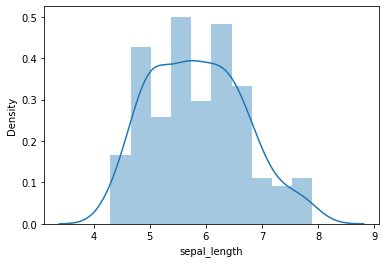

In [ ]:
sns.distplot(iris['sepal_length'], bins=10, kde=True)

#### Bar chart
We also need to pass the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


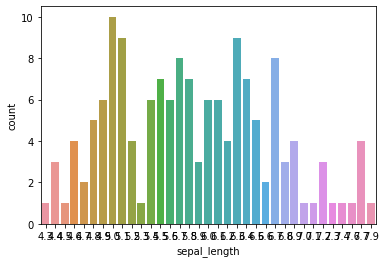

In [ ]:
sns.countplot(iris['sepal_length'])

### Others graphs

#### Box plots
A Box Plot is a graphical method of displaying the five-number summary.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


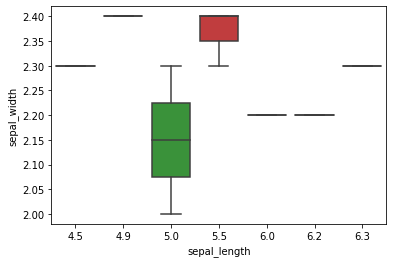

In [ ]:
df = iris[(iris['sepal_length']>=3) & (iris['sepal_width']<2.5)]
sns.boxplot('sepal_length', 'sepal_width', data=df)

#### Heatmap
A Heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. We can use Heatmaps for exploring the correlation of features in a dataset.

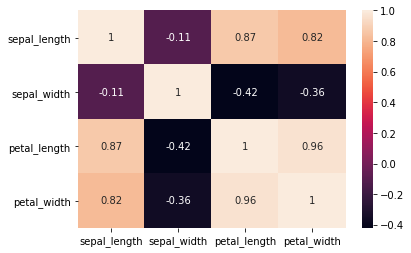

In [ ]:
sns.heatmap(iris.corr(), annot=True)

#### Faceting
Faceting is the act of breaking data variables up across multiple subplots and combining those subplots into a single figure.
Faceting is really helpful if you want to quickly explore your dataset.

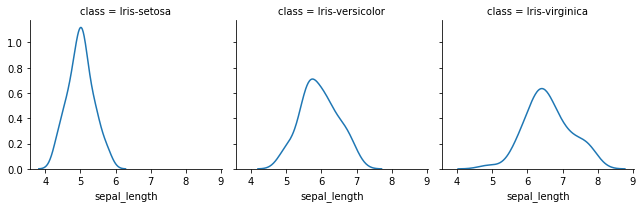

In [ ]:
g = sns.FacetGrid(iris, col='class')
g = g.map(sns.kdeplot, 'sepal_length')

#### Pairplot
Its enable you to plot a grid of pairwise relationships in a dataset.

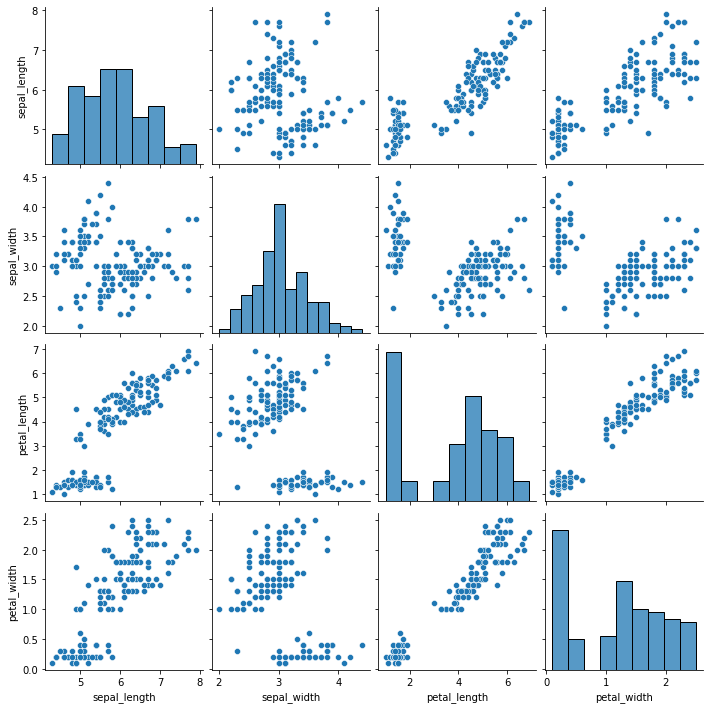

In [ ]:
sns.pairplot(iris)